# Accident on Expressway

- องค์กร : การทางพิเศษแห่งประเทศไทย
- ที่มา : https://data.go.th/dataset/vachara


จัดทำโดย

- กรกนก กลิ่นสุมาลี 6341005826
- นพกฤษฏิ์ ภูริสุริยโรจน์ 6341109426


In [48]:
#import the necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Tahoma'

In [49]:
df1 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2561.csv')
df2 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2562.csv')
df3 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2563.csv')
df4 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2564.csv')
df5 = pd.read_csv('https://github.com/Pooote/Business_Intelligent/raw/main/accident_2565.csv')

In [50]:
df1.sample(5)

,accident_date,accident_time,expw_step,weather_state,injur_man,injur_femel,dead_man,dead_femel,cause
859,2018-03-20,11:43:43,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
69,2017-10-15,10:27:27,เฉลิมมหานคร,ปกติ,0,0,0,0,ประมาท
432,2018-02-17,04:52:52,เฉลิมมหานคร,ปกติ,1,0,0,0,ขับรถเร็วเกินไป
943,2017-11-03,14:45:45,ฉลองรัช,ปกติ,1,0,0,0,เปลี่ยนช่องทางกระทันหัน
873,2018-05-14,02:11:11,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน


In [51]:
df4.sample(5)

,accident_date,accident_time,step,ad_state,acman_rec,acfem_rec,deadman_rec,deadfem_rec,cause_type
543,2020-12-18 04:27:27,04:27:27,บางพลี-สุขสวัสดิ์,ปกติ,0,0,0,0,เบรคขัดข้อง
542,2020-12-18 16:36:36,16:36:36,ศรีรัช,ปกติ,0,1,0,0,เปลี่ยนช่องทางกระทันหัน
713,2020-10-11 16:45:45,16:45:45,ศรีรัช,ปกติ,0,0,0,0,หลับใน
491,2021-01-25 19:27:27,19:27:27,บางพลี-สุขสวัสดิ์,ปกติ,1,0,0,0,ขับรถเร็วเกินไป
750,2020-10-01 16:40:40,16:40:40,ฉลองรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน


---
## Clean data
- เปลี่ยนชื่อ column ให้เป็นไปในทิศทางเดียวกัน
- จัดข้อมูลในแต่ละ column ให้เป็นไปในรูปแบบเดียวกัน / มีประเภทของข้อมูลที่เหมือนกัน
- รวม dataframe ในแต่ละปีให้เป็น dataframe เดียวกัน
- จัดการข้อมูลใน column สาเหตุของการเกิดอุบัติเหตุ

In [52]:
df5.columns

Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')

In [53]:
correct_column = ['accident_date', 'accident_time', 'express_way', 'weather_status',
                    'injury_male', 'injury_female', 'dead_male', 'dead_female', 'cause']

In [54]:
dataframe_list = [df1, df2, df3, df4, df5]
for dataframe in dataframe_list:
    dataframe.columns = correct_column

In [55]:
#dataframe accident_date มีข้อมูลทั้ง เวลา และ วัน
df4['accident_date'] = df4['accident_date'].str[:10]

In [56]:
df = pd.concat([df1,df2,df3,df4,df5])
df.sample(5)

,accident_date,accident_time,express_way,weather_status,injury_male,injury_female,dead_male,dead_female,cause
545,2018-12-08,21:33:33,ฉลองรัช,ปกติ,0,0,0,0,สาเหตุจากสภาพรถ/ถนน
483,2021-01-28,23:08:08,เฉลิมมหานคร,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
540,2019-07-31,18:19:19,ฉลองรัช,ปกติ,0,0,0,0,สาเหตุจากสภาพรถ/ถนน
639,2019-12-09,06:51:51,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
376,2021-03-19,16:32:32,ศรีรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน


In [57]:
df['accident_date'] = pd.to_datetime(df['accident_date'].astype(str) + ' ' +df['accident_time'].astype(str))
del df['accident_time']
df.rename(columns = {'accident_date':'accident_timestamp'}, inplace = True)

df.sample(5)

,accident_timestamp,express_way,weather_status,injury_male,injury_female,dead_male,dead_female,cause
641,2019-05-12 21:37:37,ทางหลวงพิเศษหมายเลข 37,ฝนตก,1,1,0,0,สาเหตุจากสภาพรถ/ถนน
52,2021-09-13 07:58:58,ฉลองรัช,ปกติ,0,0,0,0,เปลี่ยนช่องทางกระทันหัน
760,2021-11-09 15:51:51,ทางหลวงพิเศษหมายเลข 37,ปกติ,2,1,0,0,เปลี่ยนช่องทางกระทันหัน
576,2018-06-09 21:07:07,บางพลี-สุขสวัสดิ์,ปกติ,0,0,0,0,ขับรถเร็วเกินไป
941,2018-09-11 05:56:56,ฉลองรัช,ปกติ,0,1,0,0,เปลี่ยนช่องทางกระทันหัน


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 861
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   accident_timestamp  4374 non-null   datetime64[ns]
 1   express_way         4374 non-null   object        
 2   weather_status      4374 non-null   object        
 3   injury_male         4374 non-null   int64         
 4   injury_female       4374 non-null   int64         
 5   dead_male           4374 non-null   int64         
 6   dead_female         4374 non-null   int64         
 7   cause               4374 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 307.5+ KB


In [59]:
df['cause'].unique()

array(['เบรคกระทันหัน', 'เข้าผิดช่องทาง', 'ก้มเก็บเงิน',
       'ขับชิดขอบทางมาก', 'ถอยเบียดแท่นปูน', 'ขับชิดมากเกินไป',
       'เบรคกระทันหหัน', 'ขับถอยหลัง', 'ไม่ทันสังเกตุ', 'ก้มหยิบของ',
       'ถอยหลังเข้าตู้ผิด', 'ขับชิดขวามากเกินไป', 'หยิบของในรถ',
       'ผู้ขับขี่ก้มหยิบของ', 'ขับรถช้าลง', 'เชี่ยวชน',
       'บรรทุกหนักเกินไป', 'รอตรวจสอบ', 'ความร้อนขึ้นแล้วฟืนขับต่อ',
       'จอดเลนฉุกเฉิน', 'เสียหลักพลิกคว่ำ', 'กระบะจอดช่วงทางโค้ง',
       'ขับขี่ย้อนศร', 'กระระยะผิดก่อนเจ้าตู้2',
       'ก้มเก็บสิ่งของในห้องโดยสาร', '.', 'ชนท้าย', 'ยางแตก',
       'รอการตรวจสอบ', 'มึนเมา', 'ไม่ทราบสาเหตุ', 'ผู้ขับขี่หมดสติ',
       'รถมีขนาดใหญ่เกินไป', 'เบรคไม่ทัน', 'วิ่งช่องฉุกเฉิน',
       'กระบะจอดตรวจสอบสิ่งของ', 'ไฟฟ้าลัดวงจร', 'เพลิงไหม้',
       'เบรคกะทันหัน', 'เสียหลัก', 'ขับรถประมาท', 'บรรทุกยื่นล้ำ',
       'ขับรถโดยประมาท', 'ล้อหลุดไปชนรถคู่กรณี',
       'ขับรถเร็วในช่องทางฉุกเฉิน', 'เฉียวชนแล้วหลบหนี', 'เบรกติดล้อ',
       'ประมาท ขับรถเร็ว', 'ไม่มีอีซี่พาส', 'กำลังจะไปช่วย ว.

In [60]:
len(df['cause'].unique())

277

In [61]:
df['cause'] = df['cause'].str.strip()

In [62]:
df.loc[df['cause'].str.contains('เร็ว'), 'cause'] = 'ขับรถเร็วเกินกำหนด'

df.loc[df['cause'].str.contains('ก้มดู|เล่น'), 'cause'] = 'ใช้โทรศัพท์ขณะขับรถ'

df.loc[df['cause'].str.contains('ก้ม|เก็บสิ่งของ|หยิบของในรถ'), 'cause'] = 'ก้มเก็บสิ่งของ'

# รถ
df.loc[df['cause'].str.contains('ยาง|ขัดข้อง|ล้อหลุด|แตก|ชำรุด|หลุด|ไฟฟ้า|ขาด|เบรกติด|เบรคติด|เบรคไม่อยู่|เบรกไม่อยู่|พวงมาลัย|ขัด|ร้อน'), 'cause'] = 'สาเหตุจากสภาพรถ/ถนน'

# ถนน
df.loc[df['cause'].str.contains('เปียกลื่น'), 'cause'] = 'สาเหตุจากสภาพรถ/ถนน'

df.loc[df['cause'].str.contains('ประมาท|เหม่อลอย|ไม่ระมัดระวัง'), 'cause'] = 'ขับรถโดยประมาท'

df.loc[df['cause'].str.contains('ย้อน'), 'cause'] = 'ขับรถย้อนศร'

df.loc[df['cause'].str.contains('บรรทุก|ตก'), 'cause'] = 'บรรทุกเกิน/ของตกหล่น'

df.loc[df['cause'].str.contains('ชั้นชิด|ชันชิด|ขับรถกระชิด'), 'cause'] = 'ขับรถกระชั้นชิด'

df.loc[df['cause'].str.contains('เปลี่ยนช่องทางกระทันหัน'), 'cause'] = 'เปลี่ยนช่องทางกะทันหัน'

df.loc[df['cause'].str.contains('ขับชิด|ไหล่ทาง|ขับรถชิด'), 'cause'] = 'ขับชิดขอบทางมากเกินไป'

df.loc[df['cause'].str.contains('ไหล'), 'cause'] = 'รถไหล'

df.loc[df['cause'].str.contains('เมา'), 'cause'] = 'มึนเมา'

df.loc[df['cause'].str.contains('หลับใน'), 'cause'] = 'หลับใน'

df.loc[df['cause'].str.contains('ถอย'), 'cause'] = 'ถอยหลังชนสิ่งกีดขวาง'

df.loc[df['cause'].str.contains('เสียหลัก|รถเสียการทรงตัว'), 'cause'] = 'เสียหลัก'

df.loc[df['cause'].str.contains('หลง'), 'cause'] = 'หลงทาง'

df.loc[df['cause'].str.contains('เบรคกระทันหัน|เบรกกระทันหัน|เบรครถกระทันหัน|เบครกระทันหัน|เบรคกระทันหหัน|เบรกกะทันหัน|เบลกกะทันหัน|เลรคกะทันหัน|เบลคกระทันหัน|เบรคกะทันหัน'), 'cause'] = 'เบรคกะทันหัน'

df.loc[df['cause'].str.contains('เบรคไม่ทัน|เบรกไม่ทัน|หยุดรถไม่ทัน'), 'cause'] = 'เบรคไม่ทัน'

df.loc[df['cause'].str.contains('ไม่ทราบ|รอการตรวจสอบ|รอตรวจสอบ|\.|\-'), 'cause'] = 'ไม่ทราบสาเหตุ'

df.loc[df['cause'].str.contains('จอด'), 'cause'] = 'จอดรถขวางการจราจร'

df.loc[df['cause'].str.contains('สายตา|มอง|สังเกต'), 'cause'] = 'ละสายตาจากการขับขี่'

df.loc[df['cause'].str.contains('เปิดประตู'), 'cause'] = 'เปิดประตูชนสิ่งกีดขวาง'

df.loc[df['cause'].str.contains('เชียวชน|เชี่ยวชน|เฉี่ยวชน|เฉียวชน|ขับรถชน|ระยะ|กลับรถไม่พ้น'), 'cause'] = 'ขับรถเฉี่ยวชนสิ่งกีดขวาง/รถ'

df.loc[df['cause'].str.contains('ชนท้าย'), 'cause'] = 'โดนรถชนท้าย'

df.loc[df['cause'].str.contains('เข้า|วิ่งช่อง|วิ่งเลน'), 'cause'] = 'ขับรถผิดช่องทาง'


In [63]:
df['cause'].unique()

array(['เบรคกะทันหัน', 'ขับรถผิดช่องทาง', 'ก้มเก็บสิ่งของ',
       'ขับชิดขอบทางมากเกินไป', 'ถอยหลังชนสิ่งกีดขวาง',
       'ละสายตาจากการขับขี่', 'ขับรถช้าลง', 'ขับรถเฉี่ยวชนสิ่งกีดขวาง/รถ',
       'บรรทุกเกิน/ของตกหล่น', 'ไม่ทราบสาเหตุ', 'สาเหตุจากสภาพรถ/ถนน',
       'จอดรถขวางการจราจร', 'เสียหลัก', 'ขับรถย้อนศร', 'โดนรถชนท้าย',
       'มึนเมา', 'ผู้ขับขี่หมดสติ', 'รถมีขนาดใหญ่เกินไป', 'เบรคไม่ทัน',
       'เพลิงไหม้', 'ขับรถโดยประมาท', 'ขับรถเร็วเกินกำหนด',
       'ไม่มีอีซี่พาส', 'หลับใน', 'โรคประจำตัว', 'ฝ่าฝืนสัญญาณ/ป้ายจราจร',
       'เปลี่ยนช่องทางกะทันหัน', 'ขับรถกระชั้นชิด', 'ขับปาดกันไปมา',
       'แก๊สกระป๋องเล็กรั่ว', 'เปิดประตูชนสิ่งกีดขวาง',
       'เครนฟาดเสาไฟเสียหาย', 'หลงทาง', 'ไม่ได้ล็อคตู้',
       'มีกลุ่มควันขึ้นมากหลังรถ', 'รถไหล', 'ใช้โทรศัพท์ขณะขับรถ',
       'ล้อล็อค', 'สภาพแวดล้อม', 'ถูกรถร่วมทางเบียด',
       'นับเงินทอนค่าผ่านทาง', 'มีควันขึ้นที่ห้องเครื่อง',
       'ควบคุมรถไม่ได้', 'ขับรถคล่อมเลน', 'ไม่ดึงเบรคมือ'], dtype=object)

In [64]:
len(df['cause'].unique())

45

In [69]:
df.to_excel("cleaned.xlsx")

---
# EDA - Exploratory Data Analysis

In [65]:
# trend 4 ปี ว่าแนวโน้มเป็นยังไง
# เจ็บและตาย ในแต่ละ วัน
# ท้อป 5 สาเหตุ
# 2 สาเหตหลัก ในแต่ละทางด่วน

# ไม่มีที่หลบข้างทาง ถ้าเกิดอุบัติเหตุ ก็ขึ้นไปไม่ได้/ วุ่ยวาย รถขับเร็วจอดยาก
# อุบัตืเหตที่เกิดขึ้นบนทางด่วนพิเสษ มีจน เท่าไหร่ในแต่ละปี จะพบว่าจำนวนอถุบัติเหตุนั้นมีแน้วโน้มที่ลดลงทุกปี

<AxesSubplot: title={'center': 'Number of accident occurred in 4 Years'}>

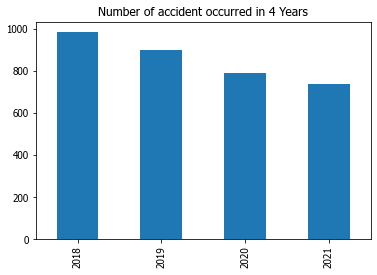

In [66]:
accident_each_year = df[~df['accident_timestamp'].dt.year.isin([2017,2022]) ]
accident_each_year['accident_timestamp'].dt.year.value_counts().plot(kind='bar',title='Number of accident occurred in 4 Years')

จากกราฟ จะพบว่า แนวโน้มอุบัติเหตุที่เกิดขึ้นในแต่ละปีนั้น 
- มีจำนวนการเกิดอุบัติเหตุที่ลดลงอย่างต่อเนื่อง ตั้งแต่ปี 2018 - 2021 
- ทำให้สามารถอนุมานได้ว่า ในปี 2022 จะมีแนวโน้มการเกิดอุบัติเหตุบนทางด่วนลดลง ซึ่งเป็นไปในทิศทางที่ดีขึ้น

---

In [67]:

# prepare data
accident_occurred = df.groupby([df['accident_timestamp'].dt.year])[['injur_man','injur_femel','dead_man','dead_femel']].sum()
accident_occurred.reset_index(inplace = True)

# plot graph

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

accident_occurred.plot(kind='bar', x='accident_timestamp',xlabel='year', y=['injur_man','injur_femel'], ax=ax1, title= 'Number of injury')
accident_occurred.plot(kind='bar', x='accident_timestamp',xlabel='year', y=['dead_man','dead_femel'], ax=ax2, title= 'Number of death')

plt.show()

KeyError: "Columns not found: 'dead_man', 'injur_man', 'injur_femel', 'dead_femel'"

จากกราฟ แสดงจำนวณผู้ได้รับบาดเจ็บ และ เสียชีวิตจากอุบัติเหตบนทางด่วน
- จำนวนอุบัติเหตที่เกิดขึ้นนั้น จะสังเกตได้ว่า จำนวนผู้ได้รับบาดเจ็บและการเสียชีวิตจากการเกิดอุบัติเหตุนั้น เป็นผู้ชายมากกว่าผู้หญิง ในทุกปี
---

<AxesSubplot: title={'center': 'acc in weekdays (numbers)'}, xlabel='accident_timestamp'>

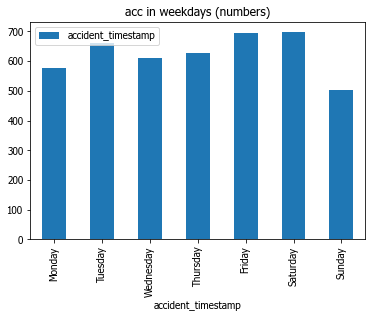

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_numbers = df.groupby([df['accident_timestamp'].dt.day_name()])[['accident_timestamp']].count().reindex(cats)
accident_numbers.plot(kind='bar',title='acc in weekdays (numbers)')

C:\Users\Acer\AppData\Local\Temp\ipykernel_3732\18118515.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_range = time_range.groupby(pd.cut(time_range['accident_timestamp'].dt.hour, np.arange(0,25,4))).sum()


<AxesSubplot: title={'center': 'Time when accident occored'}, xlabel='time_text'>

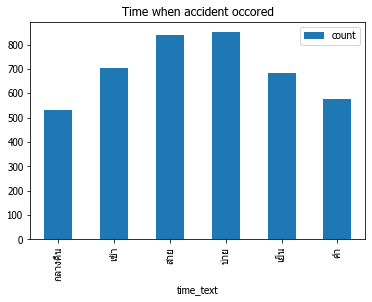

In [ ]:
time = ['กลางคืน','เช้า','สาย','บ่าย','เย็น','ค่ำ']
time_range = df.copy()
time_range['count'] = 1
# time_range['abc'] = ''
time_range = time_range.groupby(pd.cut(time_range['accident_timestamp'].dt.hour, np.arange(0,25,4))).sum()
time_range.reset_index(inplace = True)
time_range = time_range.assign( time_text= time)
time_range

time_range.plot(kind='bar',title='Time when accident occored' , x='time_text', y=['count'])

จากกราฟ จำนวนการเกิดอุบัติเหตุเมื่อแยกเป็นรายสัปดาห์
- จะพบว่าอุบัติเหตที่เกิดขึ้นนั้น เกิดในทุกวันในสัดส่วนที่ใกล้เคียงกัน
- ในวันอาทิตย์เป็น วันที่ผู้คนส่วนใหญ่ใช้เวลาอยู่บ้าน จึงทำให้เกิดอุบัติเหตุน้อยกว่าวันอื่น
---

<AxesSubplot: title={'center': 'Number of accident occored in Express way'}, xlabel='expw_step'>

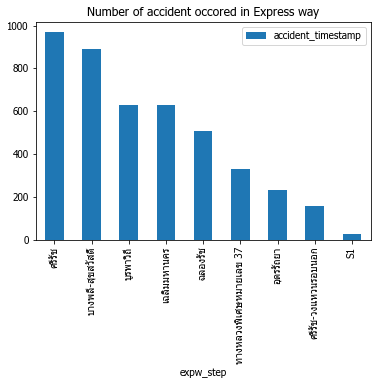

In [ ]:
dfmtw = df.groupby([df['expw_step']])[['accident_timestamp']].count()
dfmtw.reset_index(inplace = True)
dfmtw.set_index('expw_step',inplace = True)
dfmtw.sort_values(['accident_timestamp'], ascending=False, inplace = True)
dfmtw.plot(kind='bar',title='Number of accident occored in Express way')

<AxesSubplot: title={'center': 'Cause of accident'}>

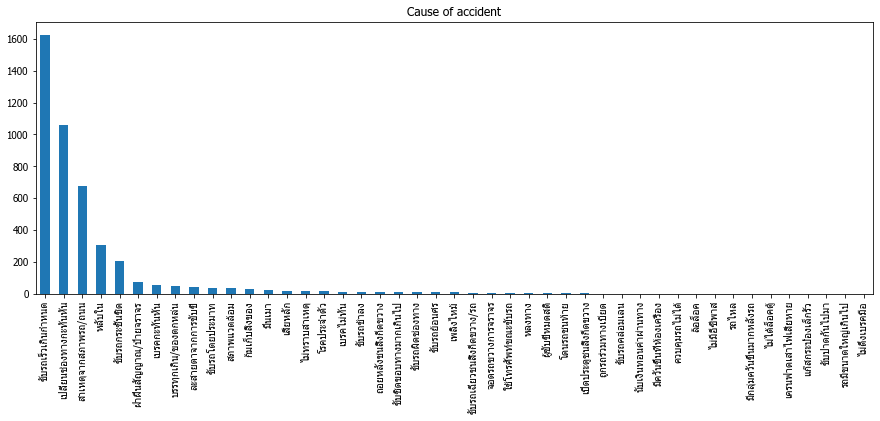

In [ ]:
# Top 5 cause
df['cause'].value_counts().plot(kind='bar', title='Cause of accident', figsize=(15,5))

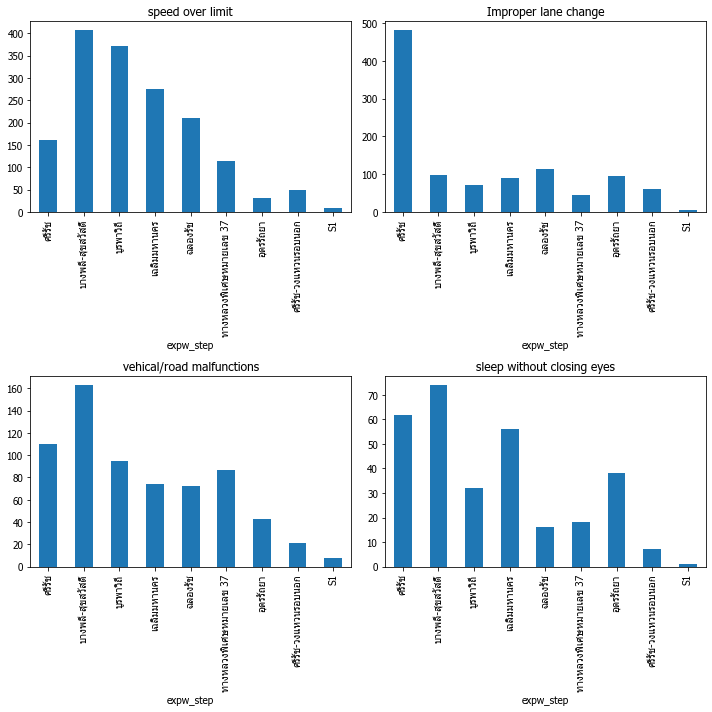

In [ ]:
motorway = dfmtw.index

fig, axs = plt.subplots(2, 2, figsize=(10,10))

df[df['cause'] == 'ขับรถเร็วเกินกำหนด']['expw_step'].value_counts().reindex(motorway).plot(kind='bar',title='speed over limit', ax=axs[0,0])
df[df['cause'] == 'เปลี่ยนช่องทางกะทันหัน']['expw_step'].value_counts().reindex(motorway).plot(kind='bar',title='Improper lane change', ax=axs[0,1])
df[df['cause'] == 'สาเหตุจากสภาพรถ/ถนน']['expw_step'].value_counts().reindex(motorway).plot(kind='bar',title='vehical/road malfunctions', ax=axs[1,0])
df[df['cause'] == 'หลับใน']['expw_step'].value_counts().reindex(motorway).plot(kind='bar',title='sleep without closing eyes', ax=axs[1,1])
fig.tight_layout()
plt.show()

จากกราฟ 
- เส้นทางด่วนศรีรัช เป็นทางด่วนที่มีการเกิดอุบัติเหตุมากที่สุด แต่สาเหตุหลักของการเกิดอุบัติเหตุบนเส้นทางนี้ เกิดจากการขับรถเปลี่ยนเลนกระทันหันเป็นหลัก
- เส้นทางด่วนบางพลี-สุขสวัสดิ์ และ เส้นทางด่วนบูรพาวิธี เป็นเส้นทางที่มีการเกิดอุบัติเหตุเนื่องจากการขับรถเร็วเกินกำหนด
- เส้นทางด่วนบางพลี-สุขสวัสดิ์ เองก็เป็นหนึ
---

## Policy

<!-- ![Policy](https://github.com/Pooote/Business_Intelligent/blob/main/policy.jpg?raw=true) -->
<img src="https://github.com/Pooote/Business_Intelligent/blob/main/policy.jpg?raw=true" alt="Policy" style="height: 1000px; width:850px;"/>

